In [137]:
import numpy as np
import pandas as pd
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
import seaborn as sns
plt.style.use('ggplot')

# Обработка данных

In [75]:
data = pd.read_csv(open('D:/Parsing_cian_flatstats.csv'), delimiter=',', quotechar='"')

In [76]:
data.shape

(9048, 16)

In [77]:
data.head()

,Unnamed: 0,N,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
0,0,0.0,4.0,70000000.0,120.0,93.0,12.0,0.021912,5.0,1.0,0.0,1.0,1.0,5,8.0,0.0
1,1,1.0,3.0,228258450.0,152.9,NaN,NaN,0.022729,7.0,1.0,0.0,1.0,0.0,3,7.0,0.0
2,2,2.0,4.0,73368788.0,125.0,100.0,NaN,0.013943,5.0,1.0,1.0,1.0,0.0,6,6.0,0.0
3,3,3.0,1.0,4814581.0,17.3,10.0,NaN,0.057849,6.0,1.0,1.0,1.0,0.0,2,5.0,1.0
4,4,4.0,1.0,4814581.0,17.3,17.3,NaN,0.058248,5.0,1.0,1.0,1.0,0.0,2,6.0,0.0


In [78]:
data.tail()

,Unnamed: 0,N,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
9043,9043,807.0,3.0,6610740.0,72.0,NaN,NaN,0.233462,10.0,1.0,1.0,1.0,1.0,8,1.0,1.0
9044,9044,808.0,2.0,6611679.0,73.0,NaN,NaN,0.527033,NaN,0.0,0.0,1.0,1.0,7,7.0,1.0
9045,9045,809.0,3.0,6612300.0,79.0,59.0,NaN,0.225376,15.0,0.0,1.0,1.0,1.0,8,1.0,1.0
9046,9046,810.0,2.0,6613820.0,69.0,NaN,NaN,0.233462,10.0,1.0,1.0,1.0,1.0,7,9.0,1.0
9047,9047,811.0,2.0,6626304.0,57.5,27.6,10.0,0.251638,5.0,0.0,1.0,1.0,0.0,1,8.0,1.0


In [79]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [80]:
data.head()

,N,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
0,0.0,4.0,70000000.0,120.0,93.0,12.0,0.021912,5.0,1.0,0.0,1.0,1.0,5,8.0,0.0
1,1.0,3.0,228258450.0,152.9,NaN,NaN,0.022729,7.0,1.0,0.0,1.0,0.0,3,7.0,0.0
2,2.0,4.0,73368788.0,125.0,100.0,NaN,0.013943,5.0,1.0,1.0,1.0,0.0,6,6.0,0.0
3,3.0,1.0,4814581.0,17.3,10.0,NaN,0.057849,6.0,1.0,1.0,1.0,0.0,2,5.0,1.0
4,4.0,1.0,4814581.0,17.3,17.3,NaN,0.058248,5.0,1.0,1.0,1.0,0.0,2,6.0,0.0


In [81]:
data[np.isnan(data)].size

135720

In [82]:
np.sum(pd.isnull(data))

N              0
Rooms          9
Price          0
Totsp          0
Livesp       740
Kitsp       4153
Dist           0
Metrdist    1463
Walk           0
Brick          0
Tel            0
Bal            0
Floor          0
Nfloors       82
New            0
dtype: int64

In [83]:
nfloors = LinearRegression()
nfloors.fit(data[-np.isnan(data.Nfloors)][['Floor', 'Price', 'Totsp']], 
            data.Nfloors[-np.isnan(data.Nfloors)])
nfloors_pred = nfloors.predict(data[np.isnan(data.Nfloors)][['Floor', 'Price', 'Totsp']])
data.Nfloors[np.isnan(data.Nfloors)] = nfloors_pred.astype(int)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [84]:
len(data.Nfloors) - data.Nfloors.count()

0

In [85]:
np.sum(pd.isnull(data))

N              0
Rooms          9
Price          0
Totsp          0
Livesp       740
Kitsp       4153
Dist           0
Metrdist    1463
Walk           0
Brick          0
Tel            0
Bal            0
Floor          0
Nfloors        0
New            0
dtype: int64

In [86]:
data[np.isnan(data.Rooms)]

,N,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
29,29.0,NaN,447249600.0,677.5,NaN,NaN,0.045700,7.0,1.0,0.0,1.0,0.0,5,5.0,0.0
169,169.0,NaN,183000000.0,322.0,NaN,NaN,0.026068,11.0,1.0,1.0,1.0,0.0,2,7.0,0.0
588,588.0,NaN,225421524.0,223.0,142.0,25.0,0.039906,6.0,1.0,1.0,1.0,0.0,2,3.0,0.0
646,646.0,NaN,339126840.0,285.0,170.0,15.0,0.017870,4.0,1.0,0.0,1.0,1.0,1,1.0,0.0
3724,476.0,NaN,195650100.0,370.0,NaN,NaN,0.124274,5.0,0.0,0.0,1.0,0.0,2,1.0,0.0
3894,646.0,NaN,97825050.0,366.0,285.0,37.0,0.177032,15.0,1.0,1.0,1.0,1.0,1,1.0,0.0
4313,253.0,NaN,69000000.0,263.0,200.0,NaN,0.175241,13.0,1.0,1.0,1.0,0.0,7,2.0,0.0
4817,757.0,NaN,69000000.0,263.0,200.0,NaN,0.175241,13.0,1.0,1.0,1.0,0.0,7,2.0,0.0
5768,84.0,NaN,56900000.0,205.2,95.5,NaN,0.116622,5.0,0.0,1.0,1.0,1.0,3,2.0,0.0


In [87]:
data[data.Totsp>200].Rooms

29      NaN
112     5.0
142     5.0
169     NaN
506     5.0
588     NaN
646     NaN
700     5.0
756     4.0
2466    4.0
3416    5.0
3502    4.0
3724    NaN
3837    5.0
3894    NaN
3978    5.0
4173    4.0
4313    NaN
4622    4.0
4817    NaN
5768    NaN
6050    5.0
8167    3.0
8168    4.0
Name: Rooms, dtype: float64

In [88]:
data.Rooms[np.isnan(data.Rooms)]=[5,4,3,4,4,4,3,3,3]

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [89]:
len(data.Rooms) - data.Rooms.count()

0

In [90]:
data.describe()

,N,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
count,9048.000000,9048.000000,9.048000e+03,9048.000000,8308.000000,4895.000000,9048.000000,7585.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000
mean,401.038462,1.721596,9.000299e+06,51.145878,29.937987,9.260266,0.200462,12.001450,0.516357,0.430482,0.999889,0.697834,3.429377,3.897104,0.311118
std,236.207695,0.790662,1.272122e+07,24.004746,16.520189,4.245732,0.134777,9.105866,0.499760,0.495171,0.010513,0.459222,2.478310,2.993734,0.462977
min,0.000000,1.000000,1.030000e+04,10.000000,1.000000,1.000000,0.009905,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,195.000000,1.000000,5.400000e+06,38.000000,19.000000,6.000000,0.119268,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,400.000000,2.000000,6.792405e+06,45.000000,27.500000,9.000000,0.170335,10.000000,1.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000
75%,606.000000,2.000000,9.250000e+06,58.200000,34.900000,10.000000,0.236278,15.000000,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000,1.000000
max,811.000000,5.000000,4.472496e+08,677.500000,340.000000,100.000000,0.830561,213.000000,1.000000,1.000000,1.000000,1.000000,9.000000,9.000000,1.000000


In [91]:
data.Metrdist[np.isnan(data.Metrdist)]=[12]

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [92]:
len(data.Metrdist) - data.Metrdist.count()

0

In [93]:
kitsp_mod = LinearRegression()
kitsp_mod.fit(data[-np.isnan(data.Kitsp)][['Totsp', 'Rooms', 'Price', 'Brick',  'New']],
             data.Kitsp[-np.isnan(data.Kitsp)])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
data.Kitsp[np.isnan(data.Kitsp)] = kitsp_mod.predict(data[np.isnan(data.Kitsp)][['Totsp', 'Rooms', 'Price', 'Brick',  'New']]).astype(int)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [95]:
livesp_mod = LinearRegression()
livesp_mod.fit(data[-np.isnan(data.Livesp)][['Totsp', 'Rooms', 'Price', 'Brick',  'New']],
             data.Livesp[-np.isnan(data.Livesp)])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
data.Livesp[np.isnan(data.Livesp)] = livesp_mod.predict(data[np.isnan(data.Livesp)]
                                                [['Totsp', 'Rooms', 'Price', 'Brick',  'New']]).round(1)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [97]:
len(data.Kitsp) - data.Kitsp.count()

0

In [98]:
len(data.Livesp) - data.Livesp.count()

0

In [99]:
np.sum(pd.isnull(data))

N           0
Rooms       0
Price       0
Totsp       0
Livesp      0
Kitsp       0
Dist        0
Metrdist    0
Walk        0
Brick       0
Tel         0
Bal         0
Floor       0
Nfloors     0
New         0
dtype: int64

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 15 columns):
N           9048 non-null float64
Rooms       9048 non-null float64
Price       9048 non-null float64
Totsp       9048 non-null float64
Livesp      9048 non-null float64
Kitsp       9048 non-null float64
Dist        9048 non-null float64
Metrdist    9048 non-null float64
Walk        9048 non-null float64
Brick       9048 non-null float64
Tel         9048 non-null float64
Bal         9048 non-null float64
Floor       9048 non-null int64
Nfloors     9048 non-null float64
New         9048 non-null float64
dtypes: float64(14), int64(1)
memory usage: 1.0 MB


In [101]:
data.N = data.N.astype(int)
data.Bal = data.Bal.astype(bool)
data.Brick = data.Brick.astype(bool)
data.Metrdist = data.Metrdist.astype(int)
data.New = data.New.astype(bool)
data.Nfloors = data.Nfloors.astype(int)
data.Price = data.Price.astype(int)
data.Rooms = data.Rooms.astype(int)
data.Tel = data.Tel.astype(bool)
data.Walk = data.Walk.astype(bool)

In [102]:
data.head()

,N,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
0,0,4,70000000,120.0,93.0,12.0,0.021912,5,True,False,True,True,5,8,False
1,1,3,228258450,152.9,112.3,16.0,0.022729,7,True,False,True,False,3,7,False
2,2,4,73368788,125.0,100.0,15.0,0.013943,5,True,True,True,False,6,6,False
3,3,1,4814581,17.3,10.0,5.0,0.057849,6,True,True,True,False,2,5,True
4,4,1,4814581,17.3,17.3,5.0,0.058248,5,True,True,True,False,2,6,False


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 15 columns):
N           9048 non-null int32
Rooms       9048 non-null int32
Price       9048 non-null int32
Totsp       9048 non-null float64
Livesp      9048 non-null float64
Kitsp       9048 non-null float64
Dist        9048 non-null float64
Metrdist    9048 non-null int32
Walk        9048 non-null bool
Brick       9048 non-null bool
Tel         9048 non-null bool
Bal         9048 non-null bool
Floor       9048 non-null int64
Nfloors     9048 non-null int32
New         9048 non-null bool
dtypes: bool(5), float64(4), int32(5), int64(1)
memory usage: 574.4 KB


# Анализ данных

In [104]:
corr_matrix = np.abs(data.corr())

In [109]:
col_names = data.columns

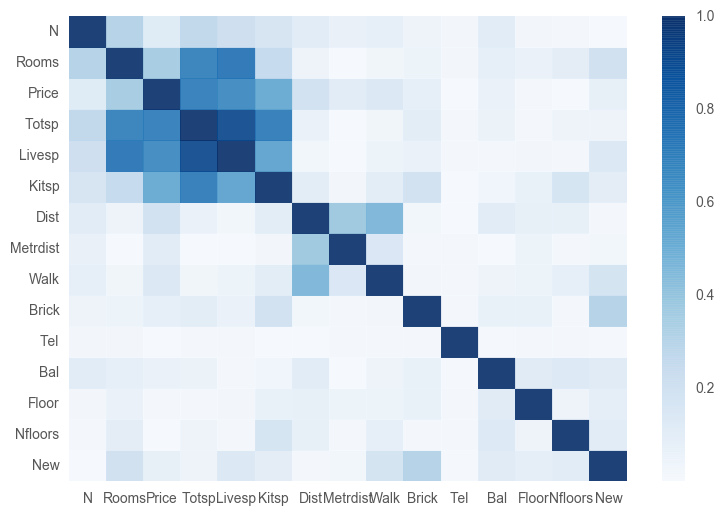

In [110]:
plt.figure(figsize = (9, 6))
sns.heatmap(corr_matrix,
            xticklabels=col_names.values,
            yticklabels=col_names.values, annot=False, 
            alpha = 0.9, cmap='Blues')

In [111]:
corr_matrix = np.asmatrix(corr_matrix)

In [113]:
corr_matrix[0,14]

0.003409519674287426

In [114]:
border = 0.5
for i in range(1,len(col_names.values)):
    for j in range(i):
        if corr_matrix[i,j] > border:
            print('corr between', col_names.values[i], 'and',  col_names.values[j], '=', corr_matrix[i,j])

corr between Totsp and Rooms = 0.708922045488
corr between Totsp and Price = 0.715962579933
corr between Livesp and Rooms = 0.749471303597
corr between Livesp and Price = 0.667449030256
corr between Livesp and Totsp = 0.913146489781
corr between Kitsp and Price = 0.535111522451
corr between Kitsp and Totsp = 0.725650716184
corr between Kitsp and Livesp = 0.55632461514


In [117]:
col_names

Index(['N', 'Rooms', 'Price', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist',
       'Walk', 'Brick', 'Tel', 'Bal', 'Floor', 'Nfloors', 'New'],
      dtype='object')

In [118]:
plot_space=['Kitsp', 'Livesp', 'Rooms', 'Totsp']
plot_location=['Dist', 'Metrdist']
plot_type =['Bal', 'Brick', 'Floor', 'New', 'Nfloors', 'Tel']

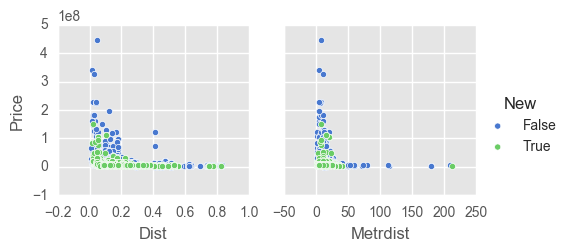

In [121]:
sns.pairplot(data, hue="New", x_vars=plot_location, y_vars=['Price'], palette='muted')

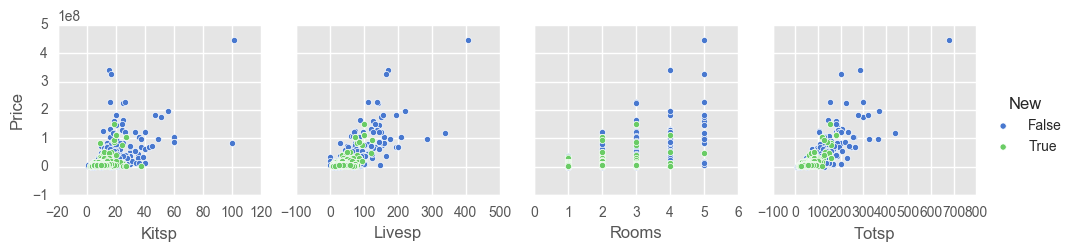

In [122]:
sns.pairplot(data, hue='New', x_vars=plot_space, y_vars='Price', palette='muted')

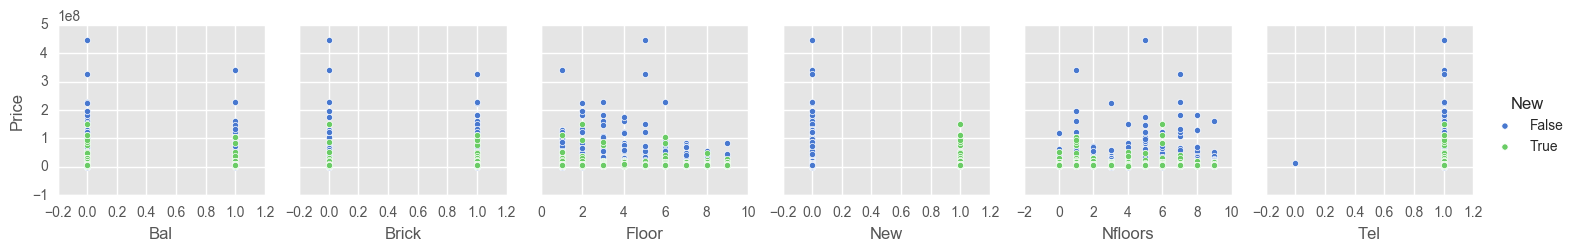

In [123]:
sns.pairplot(data, hue='New', x_vars=plot_type, y_vars='Price', palette='muted')

# Построение моделей

In [132]:
data_log = data.copy()
data_log.insert(1, 'log(Price)', np.log(data_log['Price']))
data_log.columns

Index(['N', 'log(Price)', 'Rooms', 'Price', 'Totsp', 'Livesp', 'Kitsp', 'Dist',
       'Metrdist', 'Walk', 'Brick', 'Tel', 'Bal', 'Floor', 'Nfloors', 'New'],
      dtype='object')

In [133]:
X = data_log.drop('log(Price)', axis=1)
y = data_log['log(Price)']
print(X.shape)
print(y.shape)

(9048, 15)
(9048,)


In [134]:
from sklearn.model_selection import train_test_split
random_state = np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
print(X_train.shape)
print(X_test.shape)

(7238, 15)
(1810, 15)


In [138]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def accuracy_report(y_true, y_pred):
    print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_true, y_pred))))
    print('MAE: {:.3f}'.format(mean_absolute_error(y_true, y_pred)))
    plt.scatter(y_true, y_pred)
    plt.xlabel('Reality')
    plt.ylabel('Prediction')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--')
    plt.show()

RMSE: 0.303
MAE: 0.169


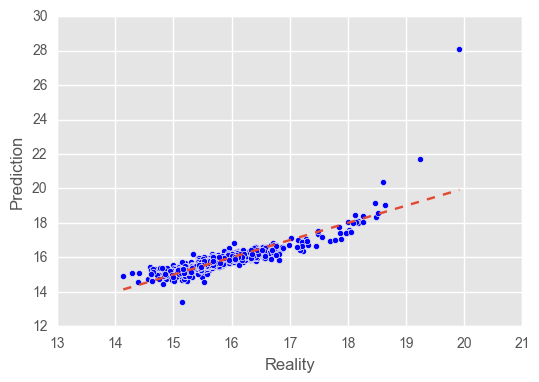

In [142]:
accuracy_report(y_test, lm.predict(X_test))

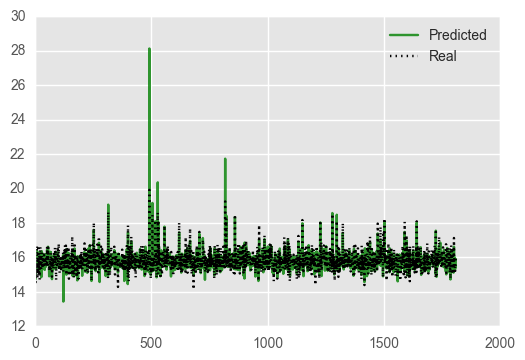

In [144]:
pr, = plt.plot(range(len(lm.predict(X_test))), lm.predict(X_test), c='g', alpha=0.8)
real, = plt.plot(range(len(lm.predict(X_test))), y_test, 'k:')
plt.legend([pr, real], ['Predicted', 'Real']);

In [145]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-8, 8, 17)
grid = GridSearchCV(estimator=Lasso(random_state=random_state), param_grid={'alpha': alphas},
                    scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print('Best RMSE: {}'.format(np.sqrt(np.abs(grid.best_score_))))
print('Best alpha: {}'.format(grid.best_estimator_.alpha))

Best RMSE: 0.2547770946945742
Best alpha: 1e-08


RMSE: 0.303
MAE: 0.169


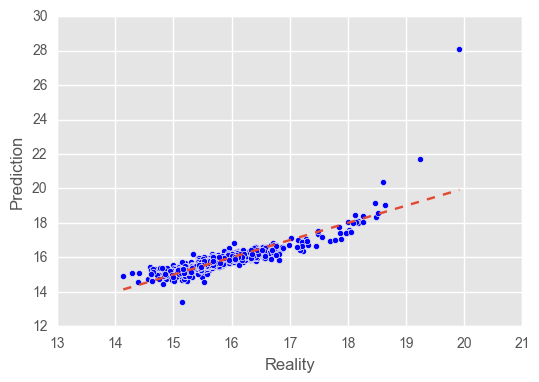

In [146]:
lasso = Lasso(alpha=grid.best_estimator_.alpha, random_state=random_state)
lasso.fit(X_train, y_train)
accuracy_report(y_test, lasso.predict(X_test))

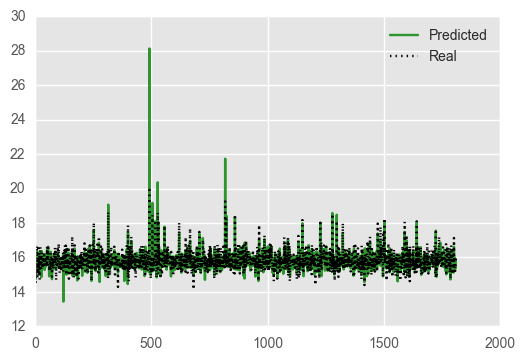

In [147]:
pr, = plt.plot(range(len(lasso.predict(X_test))), lasso.predict(X_test), c='g', alpha=0.8)
real, = plt.plot(range(len(lasso.predict(X_test))), y_test, 'k:')
plt.legend([pr, real], ['Predicted', 'Real']);

In [148]:
from sklearn.linear_model import Ridge
grid = GridSearchCV(estimator=Ridge(random_state=random_state), param_grid={'alpha': alphas},
                    scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print('Best RMSE: {}'.format(np.sqrt(np.abs(grid.best_score_))))
print('Best alpha: {}'.format(grid.best_estimator_.alpha))

Best RMSE: 0.2547770943116042
Best alpha: 1e-08


RMSE: 0.303
MAE: 0.169


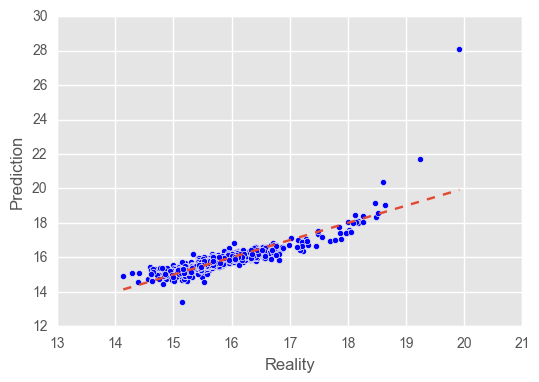

In [149]:
ridge = Ridge(alpha=grid.best_estimator_.alpha, random_state=random_state)
ridge.fit(X_train, y_train)
accuracy_report(y_test, ridge.predict(X_test))

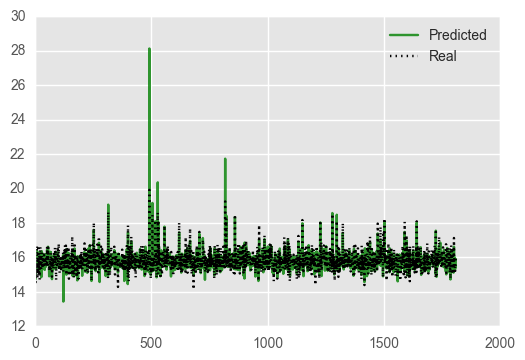

In [153]:
pr, = plt.plot(range(len(ridge.predict(X_test))), ridge.predict(X_test), c='g', alpha=0.8)
real, = plt.plot(range(len(ridge.predict(X_test))), y_test, 'k:')
plt.legend([pr, real], ['Predicted', 'Real']);

RMSE: 0.045
MAE: 0.002


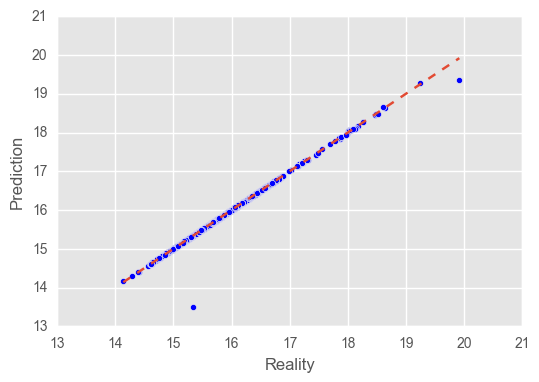

In [154]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=random_state)
rf.fit(X_train, y_train)
accuracy_report(y_test, rf.predict(X_test))

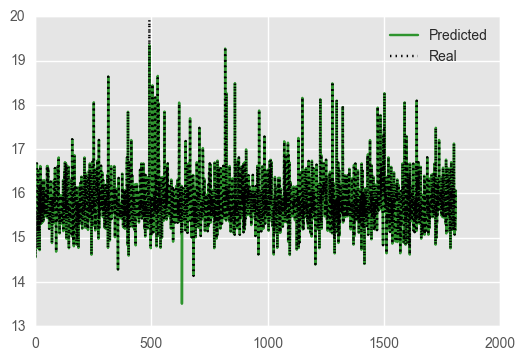

In [155]:
pr, = plt.plot(range(len(rf.predict(X_test))), rf.predict(X_test), c='g', alpha=0.8)
real, = plt.plot(range(len(rf.predict(X_test))), y_test, 'k:')
plt.legend([pr, real], ['Predicted', 'Real']);